<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="unilogoblack.jpeg" width="250px" style="display: inline-block; margin-top: 5px;">
<a href="http://www.python.org"><img src="Python-logo-notext.svg" width="70px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>


# Basic Scientific Python

J. D. Nichols 2015


## Section 9: Physics simulations

### Writing scripts

In the previous section we examined how to plot functions and data, and produce animations using Matplotlib.  Here, we use the latter to produce some simple simulations of bodies moving under the force of gravity. 

First, however, we take a look at our method of coding Python.  We have been typing Python into cells and executing it in these Notebooks.  However, as alluded to at the start of the course, this type of interactive coding is really only sufficient for writing and testing short snippets of code.  It may not have escaped your notice that the amount of coding required to execute each of our tasks has started to increase, and we will therefore now switch to writing scripts in stand-alone files, and executing them in the IPython interactive terminal.

To run IPython, open a new terminal (on SPECTRE, go to Applications > System Tools > Terminal) and type `ipython`.  The IPython interpreter will load, providing an interactive environment for typing code and running scripts. You should see something like the following (what you actually get will vary depending on your machine and Python distribution):

```
Python 2.7.10 |Anaconda 2.1.0 (x86_64)| (default, May 28 2015, 17:04:42)
Type "copyright", "credits" or "license" for more information.

IPython 2.2.0 -- An enhanced Interactive Python.
Anaconda is brought to you by Continuum Analytics.
Please check out: http://continuum.io/thanks and https://binstar.org
?         -> Introduction and overview of IPython's features.
%quickref -> Quick reference.
help      -> Python's own help system.
object?   -> Details about 'object', use 'object??' for extra details.

Using matplotlib backend: MacOSX

In [1]:
```

To run a script in a file called `filename.py` at the prompt type:

```python
In [1]: run filename.py
```

You can run code directly from the shell by typing

```bash
$ python filename.py
```

but this removes the useful interactivity of IPython.  

A useful feature of the interpreter is the debugger.  If your code fails for some reason, Python will stop execution, print an error message and enter the debugger, where you will be able to print variables, step over the code one line at a time or continue to the end if possible.  You can also enter the debugger manually by doing 

```python
import pdb

pdb.set_trace() #stop here
```

<div class="alert alert-info" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**HINT**</p>
<p>The debugger is very useful!</p>
</div>


To edit a file, you need to use a text editor - preferably one with advanced features to aid coding, such as automatic tabbing, syntax highlighting etc. On SPECTRE, decent text editors are Gedit and Nedit (you may have to enable some of the above features in the Preferences). On a Mac, TextMate 2 and TextWrangler are free and fairly decent, and on Windows, Notepad++ is also free and not terrible.  You may hear people wax lyrical about the relative benefits of editors called vi and emacs.  These programs have many advanced features, but are not needed for this course. Let's practice creating and running a script.  To help you, here is a table of some basic UNIX shell commands:

| Command          | Action                                                                                           |
|------------------|--------------------------------------------------------------------------------------------------|
| ls               | List the contents of the present directory                                                       |
| pwd              | Print the path of the present working directory (i.e. the directory you're 'in')                 |
| mkdir <director> | Create a directory                                                                               |
| cd <directory>   | Change directory                                                                                 |
| cd ..            | Change one directory up the tree (note the space before the dots)                                |
| gedit <file>     | Open Gedit and open the file if it's in the present working directory. If not, create a new file |
| rm <file>        | Delete a file                                                                                     |
| ipython          | Run IPython                                                                                      |

#### Task 9.1

On SPECTRE, open a shell (a terminal window) and, in your home area (the default directory), make a new directory called 'py' and change into it.  Then use Gedit to create a new file called `ministry.py`

```bash
$ mkdir py
$ cd py
$ gedit ministry.py
```

In the file, type
```python
def func():
    print "Silly Walks R US!"
    
result = func()
```

Save it, and open ipython:

$ ipython

Then, in the interpreter, run the script:

```python
In [1]: run ministry.py
```

You have run your first Python script!  Note that you can simply type Python into the file - when this is run, it is like you typing the lines one after the other in the command line, and all of the variables are located in your `main` namespace.   Sometimes you might see Python scripts where everything is written in functions, along the lines of the following:

```python
def main():
    <code>

if __name__ == '__main__':
    main()
```

This avoids loading up your namespace.  For our purposes, we don't need to worry about doing this.

OK, let's move on to more science...

## Simulation of a body moving under the force of gravity

In Section 8 we saw that Matplotlib can run animations. This can be used to produce simple physics simulations.  Let's take a look at this.  The following is some code that can in principle be run in this Notebook, but you should copy and paste this into a file (you can can choose the name, but something like `bounce.py` would be suitable) and run it from the interpreter as discussed above.  

The basic premise is the following.  An object, e.g. a ball, is represented by a shape plotted on a Matplotlib Axis at a particular location $(x,y)$.  The position of the shape is then updated by a function repeatedly called by `FuncAnimation`, according to the governing equations.  So, for a ball falling under gravity, we have the acceleration $g_y=-9.81\;\mathrm{ms^{-2}}$, and  if we run a loop in which we update the time $t$ each time by a small amount $\Delta t$, we can update the velocity and position of the ball as follows:


$$v_{y1} = v_{y0} + g\Delta t$$
$$y_1 = y_0 + v_{y1}\Delta t$$

$$v_{x1} = v_{x0}$$
$$x_1 = x_0 + v_{x1}\Delta t\;\;.$$

Note that the acceleration due to gravity is solely in the vertical direction, such that the horizontal component of the velocity is constant. In this example, however, we have also introduced 'walls' at the edges of the plot, at which point the horizontal component is reversed in order that the ball doesn't immediately disappear off the edge of the screen.  We have also introduced a coefficient of restitution - when the ball's central position is detected to be less than one radius above the floor (at $y=0$) or away from either wall, the relevant component of the velocity is reversed and reduced in magnitude by a small factor. The simulation will run until you close the plot window. 

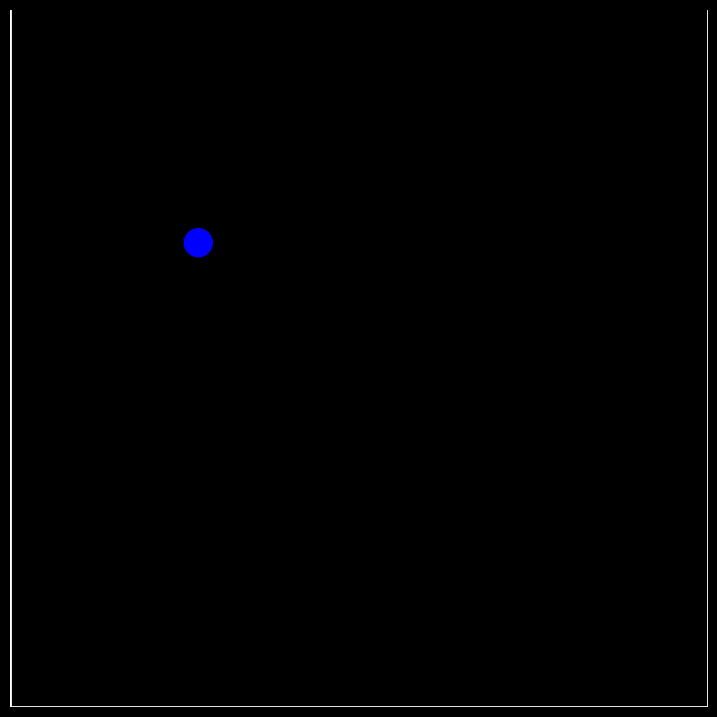

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as mpatches

# Create new Figure with black background
f = plt.figure(facecolor='black', figsize=(9,9))

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Set plot limits
ax.set_ylim(0, 10)
ax.set_xlim(0, 10)

# Remove tick marks on the axes
ax.set_xticks([])
ax.set_yticks([])

# Plot the walls and floor
ax.axhline(0, color='w', lw=2)
ax.axvline(0, color='w', lw=2)
ax.axvline(10, color='w', lw=2)

# Set the initial velocity and position of the ball
vx = 10
vy = 8
x = 2.5
y = 6.5

# Set other simulation parameters
g = -9.81     # Acceleration due to gravity
dt = 20E-3    # Time step in loop
crest = 0.9   # Coefficient of restitution for vertical bounces
rball = 0.2   # Radius of the ball

# Draw ball using the add_patch function
ball = ax.add_patch(mpatches.Circle([x,y],radius=rball, fill=True, 
             color='b', ls='solid'))

# Function to update the position and velocity of the ball
# The argument *args passes e.g. the timestep dt into the function from FuncAnimation
def step(*args):
    """This function advances the animation one time step"""
    
# Tell Python that these variables are global
# (otherwise when they are defined newly here, they override the
# identifiers carried in from the enclosing scope and 
# become local to the function)
    global vx, vy, x, y

# Test whether the ball's central location is less than 1 radius from the left wall
# If so, reverse the ball's velocity and reduce by the factor crest.
#Then, same for right wall. Otherwise, change position as per equations of motion
    if (x < rball):
        vx = -vx*crest
        x = rball+0.001 # slight adjustment needed to release ball from wall
    elif (x > 10 - rball):
        vx = -vx*crest
        x = 10 - (rball+0.001)
    else:
        vx = vx
        x = x + vx*dt

# Sim. for y component and floor        
    if y > rball:
        vy = vy + g*dt
        y = y + vy*dt
    else:
        vy = np.abs(vy)*crest
        y = rball+0.001
    
# Update the location of the centre of the ball (i.e. the Circle patch)
    ball.center = [x,y]
    
    return ball

# Run the animation, specifying the figure f, the updater function step, and
# the time interval between refreshes in ms
anim = animation.FuncAnimation(f, step, interval=dt*1E3/2.)
plt.show()


#### Task  9.2

In the above code, the acceleration due to gravity was vertical and uniform, corresponding to a small region of space near a large planet.  In general, Newton's Law of Universal Gravitation states that the gravitational force $F_g$ between two bodies of mass $m_1$ and $m_2$ separated by the displacement vector $\mathbf{\hat{r}}=r(x,y)$ is

$$F_g = \frac{Gm_1m_2}{r^2}\mathbf{\hat{r}}\;\;,$$

where $G=6.674\times10^{−11} \;\mathrm{N\,m^2\,kg^{-2}}$ is Newton's Universal Gravitational Constant.  Simulate the motion of a body, call it an asteroid, in orbit around the Earth (assumed immovable).  Plot the Earth as a blue circle, and the asteroid as as white circle (you'll need to exaggerate their actual sizes; plot limits of $\pm1\times10^9$ m are reasonable). Use a timestep (`dt` in the above code) of ~5 h and a refresh rate (`interval` in the above code) of 1 ms (i.e. = 1).  Initial velocities of order a 100 m/s should produce a decent orbit. Don't forget that the above equation contains $\mathbf{\hat{r}}$. And I'm quite sure you don't need to be reminded that $a=F/m$...

Some data to help:

* Radius of the Earth = 6,371 km
* Mass of the Earth = $5.9726 \times 10^{24}$ kg

#### Task 9.3

The path of your asteroid in the last Task was (hopefully!) an ellipse.  In reality, the gravitational force on an object is given by the sum of the forces from all masses and trajectories are more complex.  Add the Moon to the simulation - treat it as a body moving in a circular orbit with a constant angular velocity.  Moon data:

* Radius of the Moon = 1,737 km
* Mass of the Moon = $7.342 \times 10^{22}$ kg
* Orbital radius of the Moon = $3.84467\times 10^8$ m
* Angular velocity of the Moon = $2.6638\times10^{-6} \mathrm{\;rad\;s^{-1}}$.

(In 2003, the Earth acquired a [little moonlet](http://neo.jpl.nasa.gov/j002e3/j002e3d.gif) for a few months - you almost can see the final slingshot coming!)

<div class="alert alert-danger" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**Checkpoint: Please have the above marked and signed off by a demonstrator before continuing**</p>
</div>